## ***Problem Statement: Given data about COVID-19 patients, write code to visualize the impact and analyze the trend of rate of infection and recovery as well as make predictions about the number of cases expected a week in future based on the current trends. ***

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import plotly.express as px
from prophet import Prophet




In [2]:
df= pd.read_csv('/content/drive/MyDrive/For Collab/Quiz_and_assignments/covid_19_clean_complete.csv')

In [3]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [4]:
df.shape

(49068, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [6]:
df['Date']= pd.to_datetime(df['Date'], format='%Y-%m-%d') # For time based operation date column should be in the datetime formate.


In [7]:
df.isna().sum()

,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [8]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

**Data aggragation for global insight.**

In [9]:
# Group data by date to get global statistics for Confirmed, Deaths, Recovered, and Active cases
df_global = df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

# View the first few rows of the aggregated data
print(df_global.head(20))


         Date  Confirmed  Deaths  Recovered  Active
0  2020-01-22        555      17         28     510
1  2020-01-23        654      18         30     606
2  2020-01-24        941      26         36     879
3  2020-01-25       1434      42         39    1353
4  2020-01-26       2118      56         52    2010
5  2020-01-27       2927      82         61    2784
6  2020-01-28       5578     131        107    5340
7  2020-01-29       6166     133        125    5908
8  2020-01-30       8234     171        141    7922
9  2020-01-31       9927     213        219    9495
10 2020-02-01      12038     259        281   11498
11 2020-02-02      16787     362        459   15966
12 2020-02-03      19887     426        604   18857
13 2020-02-04      23898     492        821   22585
14 2020-02-05      27643     564       1071   26008
15 2020-02-06      30802     634       1418   28750
16 2020-02-07      34334     719       1903   31712
17 2020-02-08      37068     806       2470   33792
18 2020-02-0

**Plotting the confirmed cases, deaths, recovered cases over time globally.**

In [10]:
fig = px.line(df_global, x='Date', y=['Confirmed', 'Deaths', 'Recovered'],
              title='Global COVID-19 Cases Over Time',
              labels={'value': 'Number of Cases', 'variable': 'Case Type'},
              template='plotly_dark')

# Update layout for better readability
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Number of Cases',
    legend_title_text='Case Type'
)

# Show the plot
fig.show()




### **We can also visualize the same for india only.**

In [11]:
# Filter data for India
india_df = df[df['Country/Region'] == 'India'].groupby('Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

# Plot India-specific COVID-19 cases
fig = px.line(india_df, x='Date', y=['Confirmed', 'Deaths', 'Recovered'],
              title='COVID-19 Cases in India Over Time',
              labels={'value': 'Number of Cases', 'variable': 'Case Type'},
              template='plotly_dark')
# Update layout for better readability
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Number of Cases',
    legend_title_text='Case Type'
)

# Show the plot
fig.show()


### **A bar chart of daily new confirmed cases can help show the rate of new infections per day.**

In [12]:
#This visualization will allow us to see spikes and trends in daily cases.
# Calculate daily new cases
df_global['New Cases'] = df_global['Confirmed'].diff().fillna(0)

# Plot daily new cases as a bar chart
fig = px.bar(df_global, x='Date', y='New Cases',
             title='Daily New COVID-19 Cases (Global)',
             labels={'New Cases': 'Daily New Cases', 'Date': 'Date'},
             color_discrete_sequence=['#FF8790'],
             template='plotly_dark')
fig.show()


### **Death rate by country for top 10 country**

In [13]:
latest_data = df[df['Date'] == df['Date'].max()]  # Get the latest available date
latest_data['Death Rate'] = (latest_data['Deaths'] / latest_data['Confirmed']) * 100

# Filter to top 10 countries by death rate
top_death_rate_countries = latest_data.nlargest(10, 'Death Rate')

# Plot death rate by country
fig = px.bar(top_death_rate_countries, x='Country/Region', y='Death Rate',
             title='Top 10 Countries by COVID-19 Death Rate',
             labels={'Death Rate': 'Death Rate (%)', 'Country/Region': 'Country'},
             color_discrete_sequence=['#D3534F'],
             template='plotly_dark')
fig.show()


<ipython-input-13-4abf65473a42>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### **Visualization to shows geographical spread of covid-19 cases.**

In [14]:
# Latest data for confirmed cases by country
latest_data = latest_data.groupby('Country/Region')[['Confirmed']].sum().reset_index()

# Plot choropleth map
fig = px.choropleth(latest_data, locations="Country/Region", locationmode="country names",
color="Confirmed", hover_name="Country/Region",
color_continuous_scale="Reds",
title="Global COVID-19 Confirmed Cases by Country",
labels={'Confirmed': 'Confirmed Cases'},
template='plotly_dark')
fig.show()


**Explaination : In the above choropleth map we can view the confirmed cases by country geographically where the case count are shown by the intensity of the color given to different geographic area.**

## **We can also visualize for active cases over time as prerequisite to predict the active cases to understand what level of preperations would be required to handle the situation.**

In [15]:
# Plot active cases over time with area chart
fig = px.area(df_global, x='Date', y='Active',
              title='Active COVID-19 Cases Over Time (Global)',
              labels={'Active': 'Active Cases', 'Date': 'Date'},
              color_discrete_sequence=['#4CAF50'],
              template='plotly_dark')
fig.show()


**Insight : We can see from the month of april2020 the healthcare setups were under a significant stress.**

In [16]:
# Plot recovered and active cases over time in a stacked area chart
fig = px.area(df_global, x='Date', y=['Active', 'Recovered'],
              title='Recovered vs. Active COVID-19 Cases Over Time (Global)',
              labels={'value': 'Cases', 'Date': 'Date', 'variable': 'Status'},
              color_discrete_sequence=['#D3534F', '#2ECC71'],
              template='plotly_dark')
fig.show()


***Not a bad sign as recorvered cases are increasing more exponentially than active cases but the slop of active cases is still concerning. ***

# **Forcasting using Prophet Library.**

In [17]:
# Using prophet for global prediction for confirmed case.
prophet_df = df_global[['Date', 'Confirmed']].rename(columns={'Date': 'ds', 'Confirmed': 'y'}) # as we need to use prophet
print(prophet_df.head(10))


          ds     y
0 2020-01-22   555
1 2020-01-23   654
2 2020-01-24   941
3 2020-01-25  1434
4 2020-01-26  2118
5 2020-01-27  2927
6 2020-01-28  5578
7 2020-01-29  6166
8 2020-01-30  8234
9 2020-01-31  9927


In [18]:
from prophet import Prophet

model = Prophet() # Initializing

model.fit(prophet_df) # Fitting the model

future  = model.make_future_dataframe(periods=7) # Making future prediction for the next 7 days.
forecast = model.predict(future)

# Displaying the result
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd5szkmaa/2nqrkqev.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd5szkmaa/us7s5dhc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53566', 'data', 'file=/tmp/tmpd5szkmaa/2nqrkqev.json', 'init=/tmp/tmpd5szkmaa/us7s5dhc.json', 'output', 'file=/tmp/tmpd5szkmaa/prophet_modeltbpy9diy/prophet_model-20241224153148.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:31:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:31:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


            ds          yhat    yhat_lower    yhat_upper
190 2020-07-30  1.674391e+07  1.663805e+07  1.686304e+07
191 2020-07-31  1.695910e+07  1.685062e+07  1.706165e+07
192 2020-08-01  1.716676e+07  1.705596e+07  1.727000e+07
193 2020-08-02  1.736430e+07  1.725600e+07  1.748222e+07
194 2020-08-03  1.755889e+07  1.745029e+07  1.767845e+07


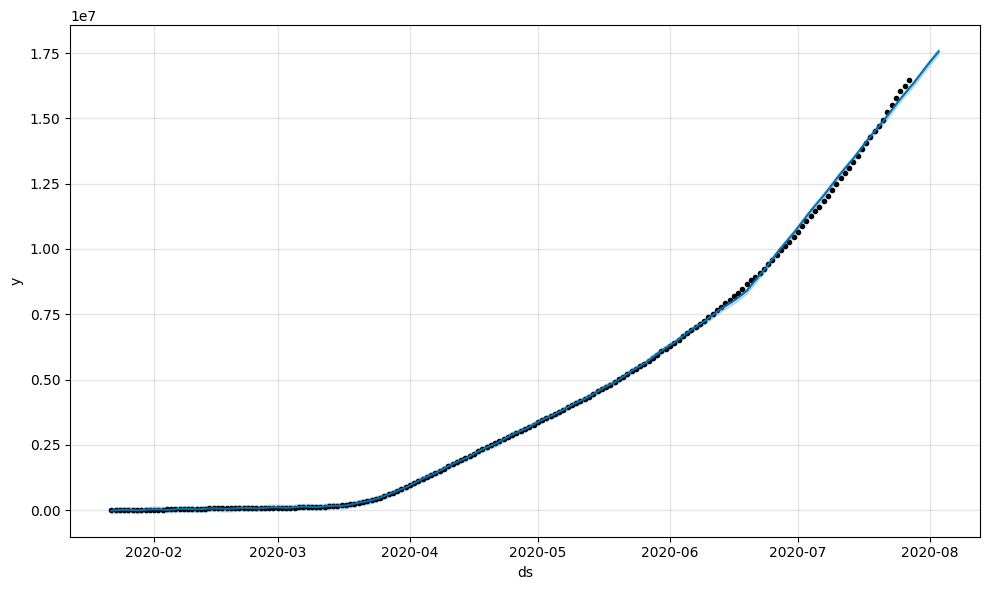

In [19]:
#Visualizing the results.
fig1 = model.plot(forecast)
fig1.show()

The Shaded area is the ylower and yupper showing the confidence 95% usually. and the dot marked line are the actual data point. We can also see the 7 days prediction line extended ahead of the actuall data line.

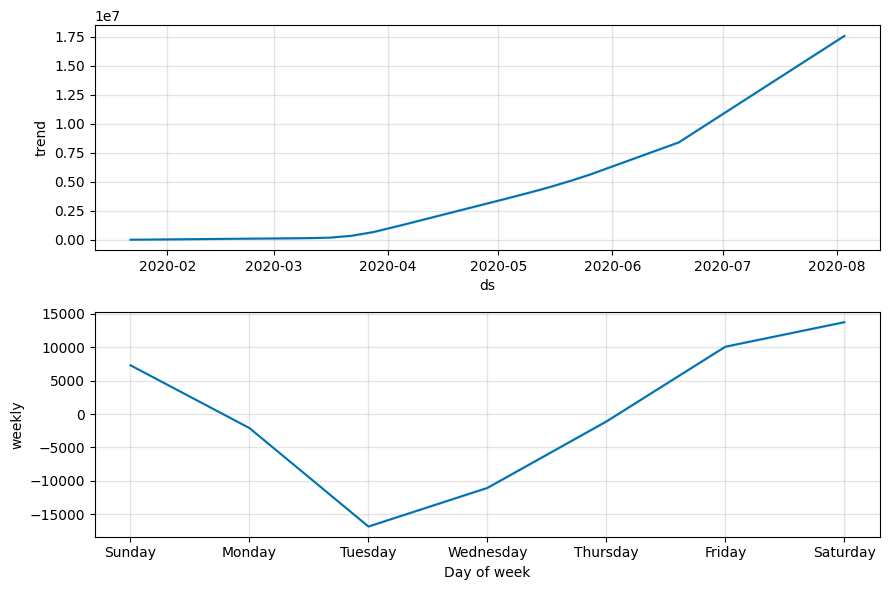

In [20]:
# We can also viasualize the trend on different period seasonality.
fig = model.plot_components(forecast)
fig.show()



### **First plot detects and shows the trend in a comparitively long period while the second or bottom plot showing it under a week.**